# Titanic: Machine Learning from Disaster
## CRISP-DM: Evaluation
**Autor:** Wanderson Marques - wdsmarques@gmail.com

Nesse notebook é realizada a **avaliação** do modelo preditivo, onde os dados de validação são utilizados para verificar a capacidade preditiva. Essa é a quinta fase da metodologia CRISP-DM, o evaluation. 

<img src="imgs/evaluation.jpg" />

### Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [2]:
# Exibir gráficos dentro do Jupyter Notebook
% matplotlib inline

# Definir tamanho padrão para os gráficos
rcParams['figure.figsize'] = 8, 4

### Carregar dataset de validação

In [3]:
dataset = pd.read_csv('datasets/valid.csv')
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,48.0,0,0,25.9292,S
1,0,3,male,NaN,0,0,7.8958,S
2,1,2,female,17.0,0,0,10.5000,S
3,0,3,female,NaN,0,0,8.1375,Q
4,1,2,female,7.0,0,2,26.2500,S


### Carregar modelo preditivo

Nesse momento o modelo preditivo já foi treinado, com os dados de treino.

In [4]:
model = joblib.load('models/model.pkl')

### Carregar scaler

In [5]:
scaler = joblib.load('models/scaler.pkl')

### Preparar os dados de validação

Para imputação em valores nulos foram utilizados os valores padrão do conjunto de treino. Age = 29.91 e Embarked = S

In [6]:
# Imputar valores nulos usando padrões do conjunto de treino
dataset.loc[dataset['Age'].isnull(), 'Age'] = 29.91
dataset.loc[dataset['Embarked'].isnull(), 'Embarked'] = 'S'

# Transformar variáveis categóricas
dataset = pd.get_dummies(dataset)
dataset.drop(['Embarked_S', 'Sex_male'], inplace=True, axis=1)

### Separar atributos e classe 

In [7]:
X = dataset.drop(['Survived'], axis=1)
y = dataset['Survived']

### Padronizar atributos

In [8]:
X = scaler.transform(X)

### Realizar predição para conjunto de validação

In [9]:
y_pred = model.predict(X)

### Gerar matriz de confusão

Text(0.5,15,'Predicted label')

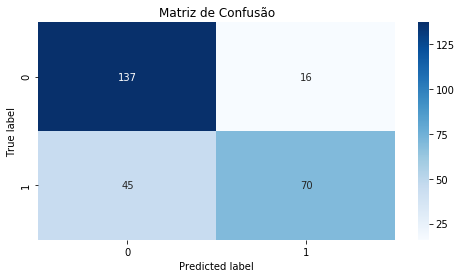

In [10]:
cm = confusion_matrix(y, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5,15,'Predicted label')

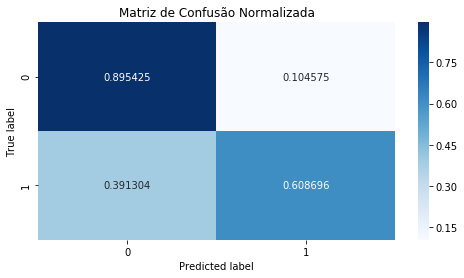

In [11]:
sns.heatmap(cm/cm.sum(axis=1)[:, np.newaxis], annot=True, cmap='Blues', fmt='g')
plt.title('Matriz de Confusão Normalizada')
plt.ylabel('True label')
plt.xlabel('Predicted label')

### Calcular métricas de classificação

In [12]:
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.90      0.82       153
          1       0.81      0.61      0.70       115

avg / total       0.78      0.77      0.77       268



### Gerar curva ROC

In [13]:
fp, tp, thresholds = roc_curve(y, y_pred)

Text(0.5,1,'Curva ROC')

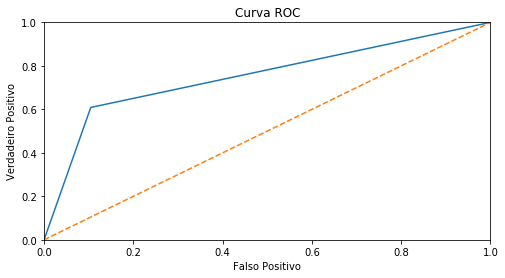

In [14]:
plt.plot(fp, tp)

plt.plot([0, 1], [0, 1], '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('Falso Positivo')
plt.ylabel('Verdadeiro Positivo')
plt.title('Curva ROC')

In [15]:
# Área sob a curva ROC
auc(fp, tp)

0.75206024438761021